In [1]:
import numpy as np
import center_algorithms as ca
import matplotlib.pyplot as plt

A script for examples for Sine Median and Maximum Cosine problems on Gr(k,n) where k>1

### To Do
    - Max Cosine not converging in robustness experiments
    - Comment cluster code

In [6]:
'''
This function verifies that we found a local optimizer for
the sine median or maximum cosine problem.
It does this by checking 100 points around the optimizer.

Inputs: 
    optimizer- a numpy array that represente the suggested optimizer
    opf_fn- a string, 'sine' for sine median and 'cosine' for maximum cosine
    data- a list of numpy arrays representing points on grassmannians
Outputs:
    local optimizer- True if all checked points rsesult in objective function values
                        that are greater than the Sine Median problem or smaller than
                        the Maximum Cosine value
'''
def sanity_check(optimizer, opt_fn, data):
    
    n,r = optimizer.shape
    
    
    #objective function value for suggested optimizer
    sln_val = ca.calc_error_1_2(data, optimizer, opt_fn) 
    
    #stays true if optimizer is a local min
    local_optimizer = True

    #checking random points
    perturb_vals = []
    for i in range(100):
        
        #random points between -.5 and .5 times .01
        perturb = (np.random.rand(n,r)-5)*.001 
        perturb_check = np.linalg.qr(perturb + optimizer)[0][:,:r]
        
        #check objective function value
        perturb_vals.append(ca.calc_error_1_2(data, perturb_check, opt_fn))

        if opt_fn == 'sine':
            if perturb_vals[i] < sln_val:
                local_optimizer = False
#                 print(perturb_vals[i])
#                 print(sln_val)
#                 print('FlagIRLS did not converge to minimizer')
        elif opt_fn == 'cosine':
            if perturb_vals[i] > sln_val:
                local_optimizer = False
#                 print(perturb_vals[i])
#                 print(sln_val)
#                 print('FlagIRLS did not converge to maximizer')
    return local_optimizer

## First Experiment

In [3]:
k1=3 #Gr(k1,n)
k2=5 #Gr(k2,n)
r=3
n=20
n_its = 100 #number of iterations for FlagIRLS
seed = 1 #random seed
num_points = 200 #number of points in dataset
n_trials = 100 #number of trials for sanity check

In [4]:
#generate dataset of points in Gr(ki,n)
#half the points are in Gr(k1,n) and the second half are in Gr(k2,n)

np.random.seed(0)

gr_list = []
for i in range(1 + num_points//2):
    Y_raw = np.random.rand(n,k1)-.5
    Y = np.linalg.qr(Y_raw)[0][:,:k1]
    gr_list.append(Y)
for i in range(num_points//2):
    Y_raw = np.random.rand(n,k2)-.5
    Y = np.linalg.qr(Y_raw)[0][:,:k2]
    gr_list.append(Y)


In [5]:
#check robustness to initialization

#do n_trials

sin_corrects = 0
cos_corrects = 0

for seed in range(1,n_trials+1):
    #use different initialization for each trial using seed
    
    #calculate sine median
    sin_median, s_err = ca.irls_flag(gr_list, r, n_its, 'sine', opt_err = 'sine', fast = False, seed = seed)
    print('Sine Median finished')

    #calculate maximum cosine
    max_cosine, c_err = ca.irls_flag(gr_list, r, n_its, 'cosine', opt_err = 'cosine', fast = False, seed = seed)
    print('Max Cos finished')
    
    if sanity_check(sin_median, 'sine', gr_list):
        sin_corrects += 1        
    if sanity_check(max_cosine, 'cosine', gr_list):
        cos_corrects += 1

print('Percent of trials that resulted in local optimizers:')
print('Sine: '+str(100* (sin_corrects/n_trials)))
print('Cos: '+str(100* (cos_corrects/n_trials)))

Sine Median finished
FlagIRLS not converged
Max Cos finished
Sine Median finished
FlagIRLS not converged
Max Cos finished
Sine Median finished
FlagIRLS not converged
Max Cos finished
Sine Median finished
FlagIRLS not converged
Max Cos finished
Sine Median finished
FlagIRLS not converged
Max Cos finished
Sine Median finished
FlagIRLS not converged
Max Cos finished
Sine Median finished
FlagIRLS not converged
Max Cos finished
Sine Median finished
FlagIRLS not converged
Max Cos finished
Sine Median finished
FlagIRLS not converged
Max Cos finished
Sine Median finished
FlagIRLS not converged
Max Cos finished
Sine Median finished
FlagIRLS not converged
Max Cos finished
Sine Median finished
FlagIRLS not converged
Max Cos finished
Sine Median finished
FlagIRLS not converged
Max Cos finished
Sine Median finished
FlagIRLS not converged
Max Cos finished
Sine Median finished
FlagIRLS not converged
Max Cos finished
Sine Median finished
FlagIRLS not converged
Max Cos finished
Sine Median finished
Fla

Text(0, 0.5, 'Objective Fucnction Value')

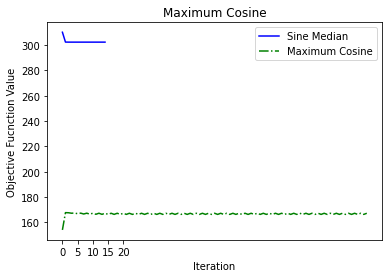

In [7]:
#convergence plots for last experiment
plt.figure()
plt.plot(s_err, label = 'Sine Median', color = 'blue', linestyle = 'solid')
plt.plot(c_err, label = 'Maximum Cosine', color = 'green', linestyle = 'dashdot')
plt.title('Maximum Cosine')
plt.legend()
plt.xticks([n for n in range(0,21,5)])
plt.xlabel('Iteration')
plt.ylabel('Objective Fucnction Value')


## Using one or a few subspaces to cluster data on Gr(k,n)

In [8]:
def calc_chordal_dist(X, Y, r):
    return np.sqrt(r - np.trace(X.T @ Y @ Y.T @ X))
def calc_euclidean_dist(X, Y):
    return np.linalg.norm(X.flatten()-Y.flatten())

### Single Cluster Experiment

Flag Mean finished
Sine Median finished
Max Cos finished
sine median converged correctly
maximum cosine converged correctly
.
.
.
flag mean chordal dist is: 0.0012924170798717192
sine median chordal dist is: 0.0013028107333816286
maximum cosine chordal dist is: 0.0012924166039698772
.
.
.
flag mean euclidean dist is: 2.0016360211586233
sine median euclidean dist is: 2.005767649465529
maximum cosine euclidean dist is: 2.001637434579156


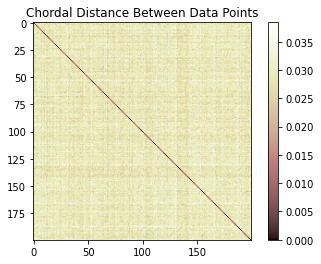

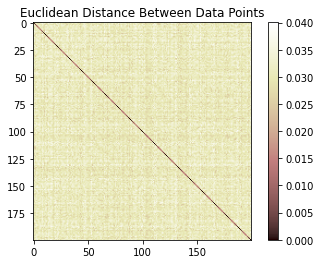

In [9]:


k=3 #Gr(k1,n)
r=3
n=20
n_its = 20 #number of iterations for FlagIRLS
seed = 1 #random seed
num_points = 200 #number of points in dataset
n_trials = 100 #number of trials for sanity check

np.random.seed(0)

center = np.random.rand(n,k)*10
center_rep = np.linalg.qr(center)[0][:,:k]

#generate dataset of points in Gr(k,n)



gr_list = []
for i in range(num_points):
    Y_raw = center_rep + (np.random.rand(n,k)-.5)*.01
    Y = np.linalg.qr(Y_raw)[0][:,:k]
    gr_list.append(Y)

    
total_p = len(gr_list)
D = np.zeros((total_p, total_p))
for i in range(total_p):
    for j in range(i+1,total_p):
        D[i,j] = calc_chordal_dist(gr_list[i], gr_list[j], r)
        D[j,i] = D[i,j].copy()

fig = plt.figure()
im = plt.imshow(D, cmap = 'pink')
fig.colorbar(im)
plt.title('Chordal Distance Between Data Points')

D = np.zeros((total_p, total_p))
for i in range(total_p):
    for j in range(i+1,total_p):
        D[i,j] = calc_euclidean_dist(gr_list[i], gr_list[j])
        D[j,i] = D[i,j].copy()

fig = plt.figure()
im = plt.imshow(D, cmap = 'pink')
fig.colorbar(im)
plt.title('Euclidean Distance Between Data Points')

#calculate flag mean
flag_mean = ca.flag_mean(gr_list, r)
print('Flag Mean finished')

#calculate sine median
sin_median, s_err = ca.irls_flag(gr_list, r, n_its, 'sine', opt_err = 'sine', fast = False, seed = seed)
print('Sine Median finished')

#calculate maximum cosine
max_cosine, c_err = ca.irls_flag(gr_list, r, n_its, 'cosine', opt_err = 'cosine', fast = False, seed = seed)
print('Max Cos finished')
    
if sanity_check(sin_median, 'sine', gr_list):
    print('sine median converged correctly')      
if sanity_check(max_cosine, 'cosine', gr_list):
    print('maximum cosine converged correctly') 
    


print('.')
print('.')
print('.')
    
print('flag mean chordal dist is: ' +str(calc_chordal_dist(center_rep, flag_mean, r)))

print('sine median chordal dist is: ' +str(calc_chordal_dist(center_rep, sin_median, r)))

print('maximum cosine chordal dist is: ' +str(calc_chordal_dist(center_rep, max_cosine, r)))

print('.')
print('.')
print('.')

print('flag mean euclidean dist is: ' +str(calc_euclidean_dist(center_rep, flag_mean)))

print('sine median euclidean dist is: ' +str(calc_euclidean_dist(center_rep, sin_median)))

print('maximum cosine euclidean dist is: ' +str(calc_euclidean_dist(center_rep, max_cosine)))

### Single Cluster with 10% Outliers

Flag Mean finished
Sine Median finished
Max Cos finished
sine median converged correctly
maximum cosine converged correctly
.
.
.
flag mean chordal dist is: 0.01408708414315948
sine median chordal dist is: 0.0015992460217112059
maximum cosine chordal dist is: 0.039652699908634084
.
.
.
flag mean euclidean dist is: 2.3268980910848867
sine median euclidean dist is: 2.3480162202853054
maximum cosine euclidean dist is: 2.2949817838308597


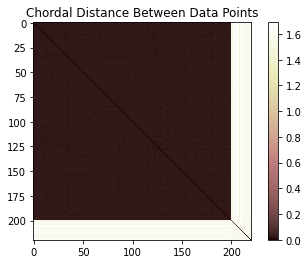

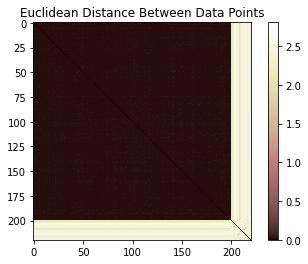

In [10]:
k=3 #Gr(k1,n)
r=3
n=20
n_its = 20 #number of iterations for FlagIRLS
seed = 1 #random seed
num_points = 200 #number of points in dataset
n_trials = 100 #number of trials for sanity check

np.random.seed(seed)

center = np.random.rand(n,k)*10
center_rep = np.linalg.qr(center)[0][:,:k]

#generate dataset of points in Gr(k,n)



gr_list = []
for i in range(num_points):
    Y_raw = center_rep + (np.random.rand(n,k)-.5)*.01
    Y = np.linalg.qr(Y_raw)[0][:,:k]
    gr_list.append(Y)
    
for i in range(num_points*.10):
    Y_raw = np.random.rand(n,k)-.5
    Y = np.linalg.qr(Y_raw)[0][:,:k]
    gr_list.append(Y)
    
total_p = len(gr_list)
D = np.zeros((total_p, total_p))
for i in range(total_p):
    for j in range(i+1,total_p):
        D[i,j] = calc_chordal_dist(gr_list[i], gr_list[j], r)
        D[j,i] = D[i,j].copy()

fig = plt.figure()
im = plt.imshow(D, cmap = 'pink')
fig.colorbar(im)
plt.title('Chordal Distance Between Data Points')

D = np.zeros((total_p, total_p))
for i in range(total_p):
    for j in range(i+1,total_p):
        D[i,j] = calc_euclidean_dist(gr_list[i], gr_list[j])
        D[j,i] = D[i,j].copy()

fig = plt.figure()
im = plt.imshow(D, cmap = 'pink')
fig.colorbar(im)
plt.title('Euclidean Distance Between Data Points')

#calculate flag mean
flag_mean = ca.flag_mean(gr_list, r)
print('Flag Mean finished')

#calculate sine median
sin_median, s_err = ca.irls_flag(gr_list, r, n_its, 'sine', opt_err = 'sine', fast = False, seed = seed)
print('Sine Median finished')

#calculate maximum cosine
max_cosine, c_err = ca.irls_flag(gr_list, r, n_its, 'cosine', opt_err = 'cosine', fast = False, seed = seed)
print('Max Cos finished')
    
if sanity_check(sin_median, 'sine', gr_list):
    print('sine median converged correctly')      
if sanity_check(max_cosine, 'cosine', gr_list):
    print('maximum cosine converged correctly') 
    


print('.')
print('.')
print('.')
    
print('flag mean chordal dist is: ' +str(calc_chordal_dist(center_rep, flag_mean, r)))

print('sine median chordal dist is: ' +str(calc_chordal_dist(center_rep, sin_median, r)))

print('maximum cosine chordal dist is: ' +str(calc_chordal_dist(center_rep, max_cosine, r)))

print('.')
print('.')
print('.')

print('flag mean euclidean dist is: ' +str(calc_euclidean_dist(center_rep, flag_mean)))

print('sine median euclidean dist is: ' +str(calc_euclidean_dist(center_rep, sin_median)))

print('maximum cosine euclidean dist is: ' +str(calc_euclidean_dist(center_rep, max_cosine)))

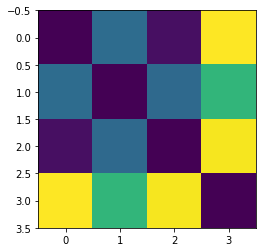

In [11]:
D = np.zeros((4,4))
D[0,1] = calc_chordal_dist(center_rep, flag_mean, r)
D[0,2] = calc_chordal_dist(center_rep, sin_median, r)
D[0,3] = calc_chordal_dist(center_rep, max_cosine, r)
D[1,2] = calc_chordal_dist(flag_mean, sin_median, r)
D[1,3] = calc_chordal_dist(flag_mean, max_cosine, r)
D[2,3] = calc_chordal_dist(sin_median, max_cosine, r)

D = D + D.T
plt.imshow(D)


### Two Clusters of the Same Size

Flag Mean finished
Sine Median finished
FlagIRLS not converged
Max Cos finished
sine median converged correctly
.
.
.
flag mean chordal dist from center 1 and 2 are: 0.9156861966473274, 0.9162629652939442
sine median chordal dist from center 1 and 2 are: 0.007631539541247656, 1.4126718197491916
maximum cosine chordal dist from center 1 and 2 are: 0.4255777109154162, 1.243113619263743


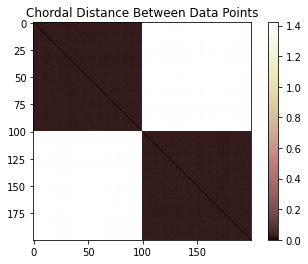

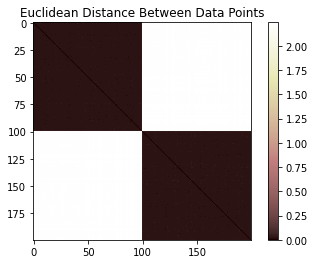

In [13]:
k=3 #Gr(k1,n)
r=3
n=20
n_its = 20 #number of iterations for FlagIRLS
seed = 1 #random seed
num_points = 200 #number of points in dataset
n_trials = 100 #number of trials for sanity check

np.random.seed(seed)

center = np.random.rand(n,k)*10
center_rep = np.linalg.qr(center)[0][:,:k]

center2 = np.random.rand(n,k)*10
center2_rep = np.linalg.qr(center2)[0][:,:k]

#generate dataset of points in Gr(k,n)



gr_list = []
for i in range(num_points//2):
    Y_raw = center_rep + (np.random.rand(n,k)-.5)*.01
    Y = np.linalg.qr(Y_raw)[0][:,:k]
    gr_list.append(Y)
    
for i in range(num_points//2):
    Y_raw = center2_rep + (np.random.rand(n,k)-.5)*.01
    Y = np.linalg.qr(Y_raw)[0][:,:k]
    gr_list.append(Y)
    
total_p = len(gr_list)
D = np.zeros((total_p, total_p))
for i in range(total_p):
    for j in range(i+1,total_p):
        D[i,j] = calc_chordal_dist(gr_list[i], gr_list[j], r)
        D[j,i] = D[i,j].copy()

fig = plt.figure()
im = plt.imshow(D, cmap = 'pink')
fig.colorbar(im)
plt.title('Chordal Distance Between Data Points')

D = np.zeros((total_p, total_p))
for i in range(total_p):
    for j in range(i+1,total_p):
        D[i,j] = calc_euclidean_dist(gr_list[i], gr_list[j])
        D[j,i] = D[i,j].copy()

fig = plt.figure()
im = plt.imshow(D, cmap = 'pink')
fig.colorbar(im)
plt.title('Euclidean Distance Between Data Points')

#calculate flag mean
flag_mean = ca.flag_mean(gr_list, r)
print('Flag Mean finished')

#calculate sine median
sin_median, s_err = ca.irls_flag(gr_list, r, n_its, 'sine', opt_err = 'sine', fast = False, seed = seed)
print('Sine Median finished')

#calculate maximum cosine
max_cosine, c_err = ca.irls_flag(gr_list, r, n_its, 'cosine', opt_err = 'cosine', fast = False, seed = seed)
print('Max Cos finished')
    
if sanity_check(sin_median, 'sine', gr_list):
    print('sine median converged correctly')      
if sanity_check(max_cosine, 'cosine', gr_list):
    print('maximum cosine converged correctly') 
    


print('.')
print('.')
print('.')
    
print('flag mean chordal dist from center 1 and 2 are: ' +str(calc_chordal_dist(center_rep, flag_mean, r))+', '+ str(calc_chordal_dist(center2_rep, flag_mean, r)))

print('sine median chordal dist from center 1 and 2 are: ' +str(calc_chordal_dist(center_rep, sin_median, r))+', '+ str(calc_chordal_dist(center2_rep, sin_median, r)))

print('maximum cosine chordal dist from center 1 and 2 are: ' +str(calc_chordal_dist(center_rep, max_cosine, r))+', '+ str(calc_chordal_dist(center2_rep, max_cosine, r)))



### Three Clusters of the Same Size

Flag Mean finished
FlagIRLS not converged
Sine Median finished
FlagIRLS not converged
Max Cos finished
sine median converged correctly
maximum cosine converged correctly
.
.
.
flag mean chordal dist from center 1, 2 and 3 are: 1.0170970796895373, 1.0336670423034162, 1.0801871706630772
sine median chordal dist from center 1, 2 and 3 are: 0.014333200524942899, 1.4116455465492177, 1.0801871706630772
maximum cosine chordal dist from center 1, 2 and 3 are: 1.0258579144508417, 1.0349764743666967, 1.0801871706630772


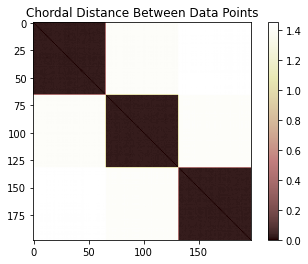

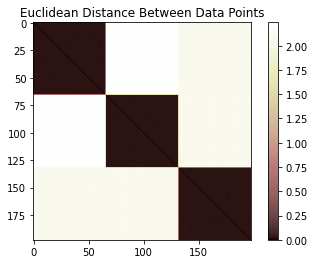

In [14]:
k=3 #Gr(k1,n)
r=3
n=20
n_its = 20 #number of iterations for FlagIRLS
seed = 1 #random seed
num_points = 200 #number of points in dataset
n_trials = 100 #number of trials for sanity check

np.random.seed(seed)

center = np.random.rand(n,k)*10
center_rep = np.linalg.qr(center)[0][:,:k]

center2 = np.random.rand(n,k)*10
center2_rep = np.linalg.qr(center2)[0][:,:k]

center3 = np.random.rand(n,k)*10
center3_rep = np.linalg.qr(center3)[0][:,:k]

#generate dataset of points in Gr(k,n)



gr_list = []
for i in range(num_points//3):
    Y_raw = center_rep + (np.random.rand(n,k)-.5)*.01
    Y = np.linalg.qr(Y_raw)[0][:,:k]
    gr_list.append(Y)
    
for i in range(num_points//3):
    Y_raw = center2_rep + (np.random.rand(n,k)-.5)*.01
    Y = np.linalg.qr(Y_raw)[0][:,:k]
    gr_list.append(Y)
    
for i in range(num_points//3):
    Y_raw = center3_rep + (np.random.rand(n,k)-.5)*.01
    Y = np.linalg.qr(Y_raw)[0][:,:k]
    gr_list.append(Y)
    
total_p = len(gr_list)
D = np.zeros((total_p, total_p))
for i in range(total_p):
    for j in range(i+1,total_p):
        D[i,j] = calc_chordal_dist(gr_list[i], gr_list[j], r)
        D[j,i] = D[i,j].copy()

fig = plt.figure()
im = plt.imshow(D, cmap = 'pink')
fig.colorbar(im)
plt.title('Chordal Distance Between Data Points')

D = np.zeros((total_p, total_p))
for i in range(total_p):
    for j in range(i+1,total_p):
        D[i,j] = calc_euclidean_dist(gr_list[i], gr_list[j])
        D[j,i] = D[i,j].copy()

fig = plt.figure()
im = plt.imshow(D, cmap = 'pink')
fig.colorbar(im)
plt.title('Euclidean Distance Between Data Points')

#calculate flag mean
flag_mean = ca.flag_mean(gr_list, r)
print('Flag Mean finished')

#calculate sine median
sin_median, s_err = ca.irls_flag(gr_list, r, n_its, 'sine', opt_err = 'sine', fast = False, seed = seed)
print('Sine Median finished')

#calculate maximum cosine
max_cosine, c_err = ca.irls_flag(gr_list, r, n_its, 'cosine', opt_err = 'cosine', fast = False, seed = seed)
print('Max Cos finished')
    
if sanity_check(sin_median, 'sine', gr_list):
    print('sine median converged correctly')      
if sanity_check(max_cosine, 'cosine', gr_list):
    print('maximum cosine converged correctly') 
    

print('.')
print('.')
print('.')
    
print('flag mean chordal dist from center 1, 2 and 3 are: ' +str(calc_chordal_dist(center_rep, flag_mean, r))+', '+ str(calc_chordal_dist(center2_rep, flag_mean, r))+', '+ str(calc_chordal_dist(center3_rep, flag_mean, r)))

print('sine median chordal dist from center 1, 2 and 3 are: ' +str(calc_chordal_dist(center_rep, sin_median, r))+', '+ str(calc_chordal_dist(center2_rep, sin_median, r))+', '+ str(calc_chordal_dist(center3_rep, flag_mean, r)))

print('maximum cosine chordal dist from center 1, 2 and 3 are: ' +str(calc_chordal_dist(center_rep, max_cosine, r))+', '+ str(calc_chordal_dist(center2_rep, max_cosine, r))+', '+ str(calc_chordal_dist(center3_rep, flag_mean, r)))
